In [1]:
!pip install feature-engine

In [2]:
!pip install category_encoders

Importing project dependecies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
data=pd.read_csv("D:\Download\Micro Credit Project\Data file.csv",parse_dates=["pdate"])
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [5]:
data.shape

(209593, 37)

There are 209593 rows and 37 columns in this dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Unnamed: 0            209593 non-null  int64         
 1   label                 209593 non-null  int64         
 2   msisdn                209593 non-null  object        
 3   aon                   209593 non-null  float64       
 4   daily_decr30          209593 non-null  float64       
 5   daily_decr90          209593 non-null  float64       
 6   rental30              209593 non-null  float64       
 7   rental90              209593 non-null  float64       
 8   last_rech_date_ma     209593 non-null  float64       
 9   last_rech_date_da     209593 non-null  float64       
 10  last_rech_amt_ma      209593 non-null  int64         
 11  cnt_ma_rech30         209593 non-null  int64         
 12  fr_ma_rech30          209593 non-null  float64       
 13 

There is no null value we can see in the dataset

In [7]:
#There is unnamed column we will remove this
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [9]:
data.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [10]:
#parsing pdate column to date and time
data.pdate = pd.to_datetime(data.pdate)
data.dtypes

label                            int64
msisdn                          object
aon                            float64
daily_decr30                   float64
daily_decr90                   float64
rental30                       float64
rental90                       float64
last_rech_date_ma              float64
last_rech_date_da              float64
last_rech_amt_ma                 int64
cnt_ma_rech30                    int64
fr_ma_rech30                   float64
sumamnt_ma_rech30              float64
medianamnt_ma_rech30           float64
medianmarechprebal30           float64
cnt_ma_rech90                    int64
fr_ma_rech90                     int64
sumamnt_ma_rech90                int64
medianamnt_ma_rech90           float64
medianmarechprebal90           float64
cnt_da_rech30                  float64
fr_da_rech30                   float64
cnt_da_rech90                    int64
fr_da_rech90                     int64
cnt_loans30                      int64
amnt_loans30             

In [11]:
#checking for number of unique values in each column
data.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [12]:
#dropping columns which are not necessary for the target variable i.e."msisdn" "pcircle" 
data = data.drop(["pcircle","msisdn"],axis=1)
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [13]:
#statistical summary of the data
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [14]:
#different columns for date time
new_data = data.copy()
new_data['year'] = pd.DatetimeIndex(data.pdate).year
new_data['month'] = pd.DatetimeIndex(data.pdate).month
new_data['date'] = pd.DatetimeIndex(data.pdate).day
new_data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,year,month,date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,6,22


In [15]:
#dropping year as it has only one value and pdate as it is of no use now
new_data.drop(["pdate","year"],axis=1,inplace=True)
new_data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


Check for missing values

<AxesSubplot:>

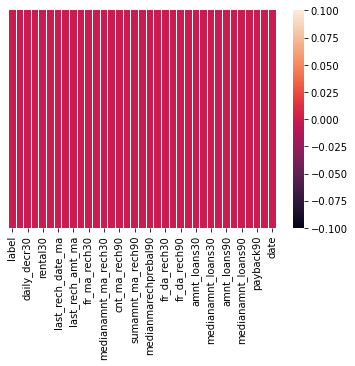

In [16]:
sns.heatmap(new_data.isnull(),yticklabels=False)

Correlation

In [17]:
corr = new_data.corr()
corr

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148,0.068643


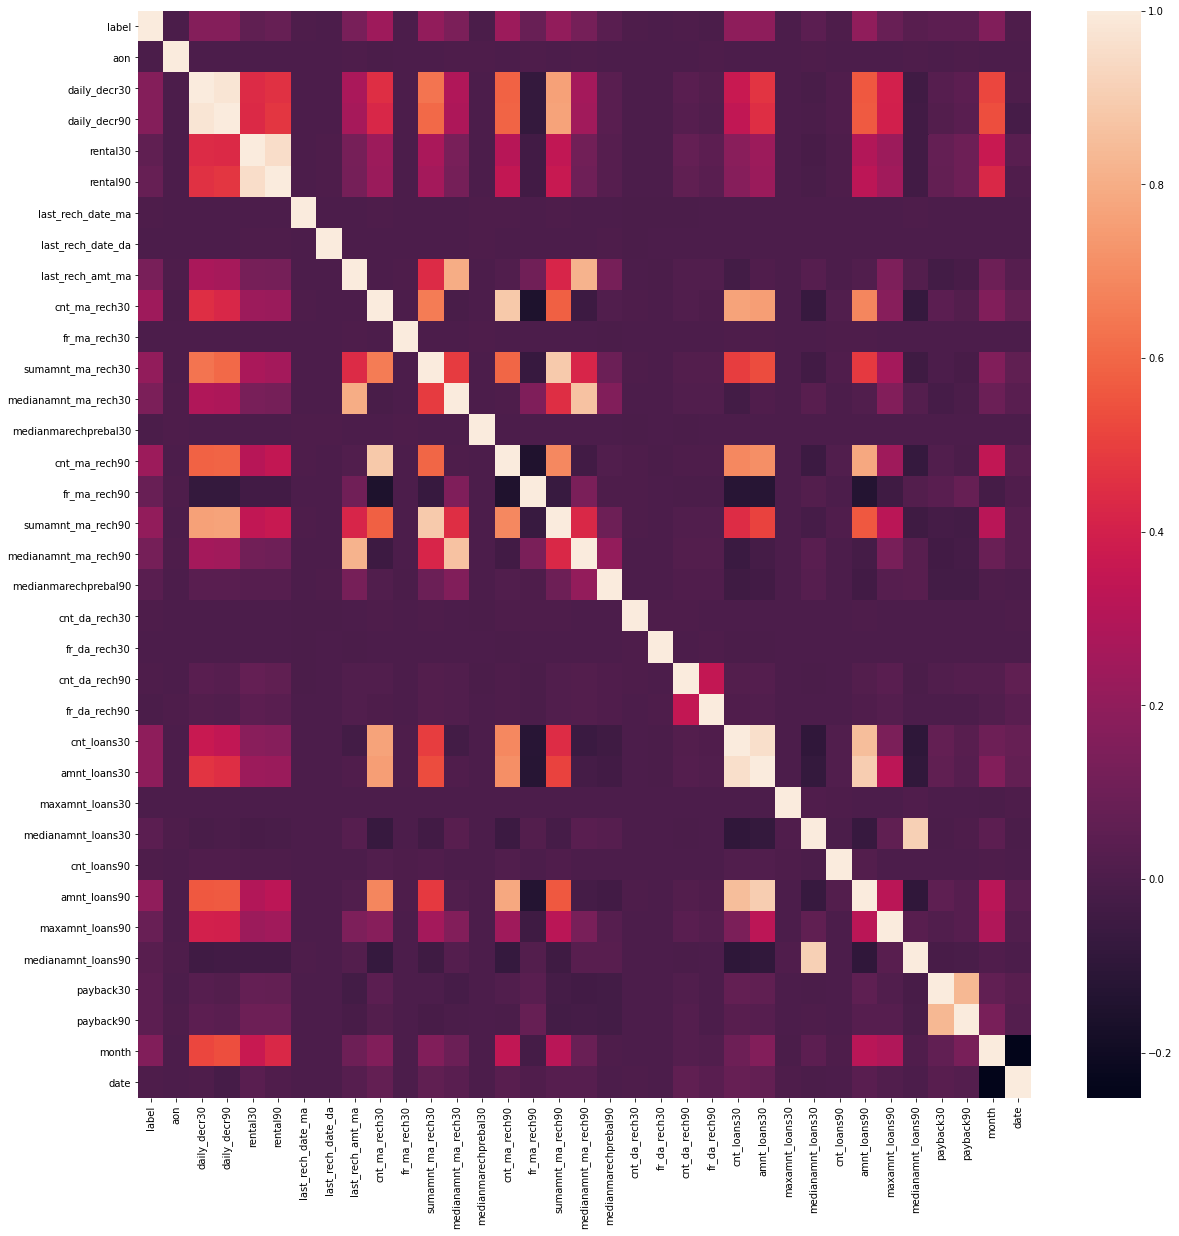

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

<AxesSubplot:title={'center':'Correlation with Target'}>

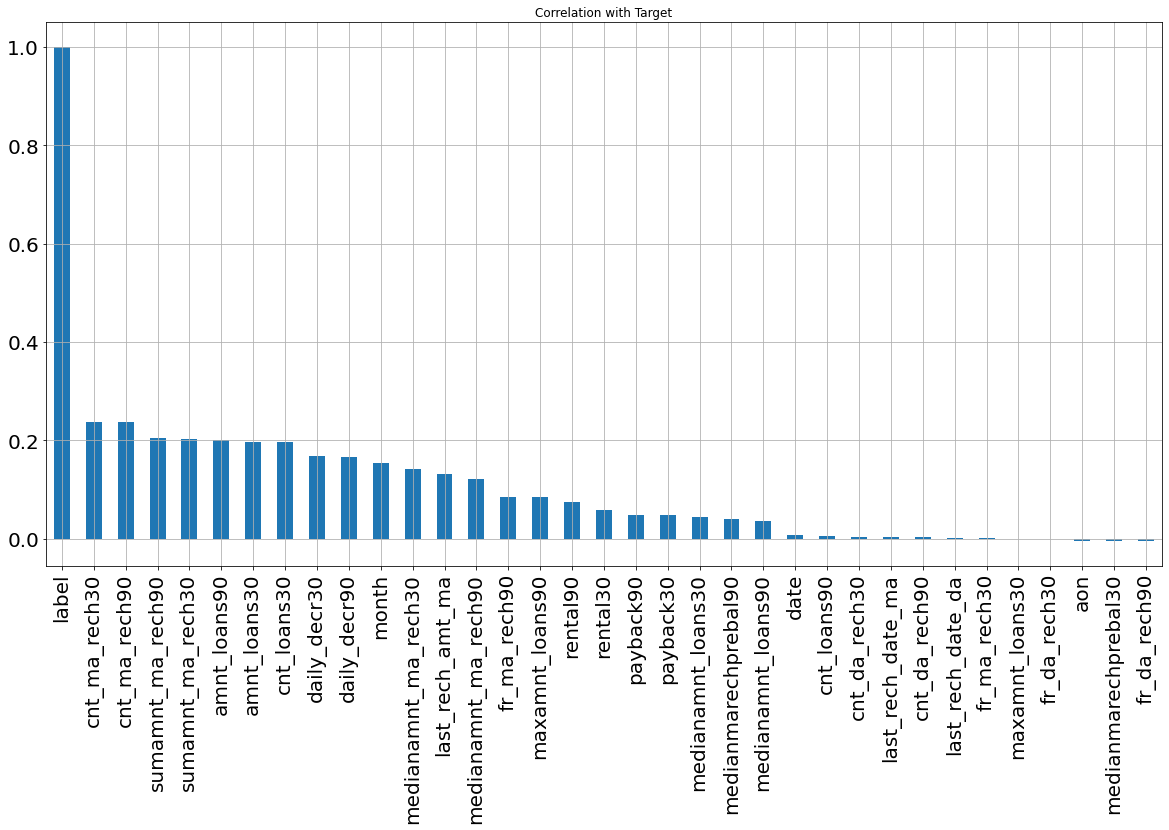

In [19]:
corr['label'].sort_values(ascending=False).plot.bar(figsize=(20,10),grid=True,title='Correlation with Target',fontsize=20)

## EDA

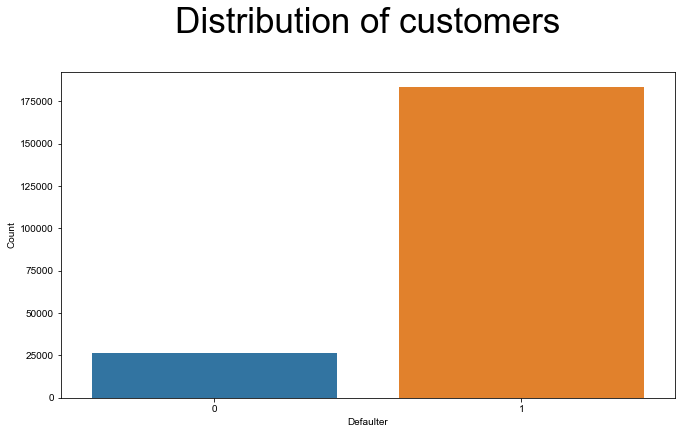

In [20]:
# Distribution of Target Variable
plt.figure(figsize=(11,6))
sns.countplot(new_data.label)
sns.set_style('whitegrid')
plt.ylabel("Count")
plt.xlabel("Defaulter")
plt.title("Distribution of customers",fontsize=35,y=1.1)
plt.show()

Observation : It is Clearly visible that our target dataset is imbalance .

In [21]:
# target values count
data.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

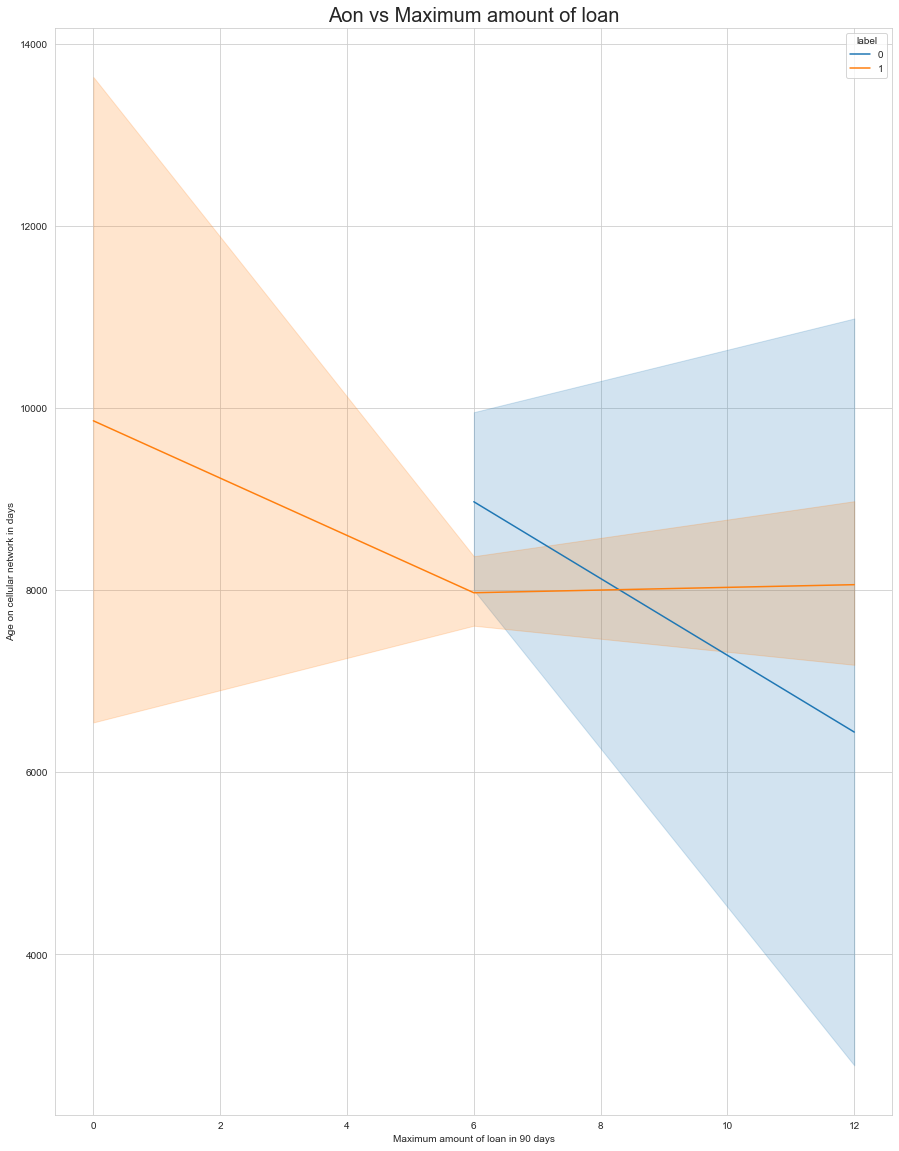

In [22]:
plt.figure(figsize=(15,20))
sns.lineplot(x='maxamnt_loans90', y='aon', data=data, hue='label')
plt.xlabel('Maximum amount of loan in 90 days')
plt.ylabel('Age on cellular network in days')
plt.title('Aon vs Maximum amount of loan',fontsize=20)
plt.show()


Observation : From above plot we can infer that customers with aon above 6000 - 8000 tend to be non-defaulters whereas customers ranging between 8000-10000 can be defaulters and customers below aon 6000 are majorly defaulters.

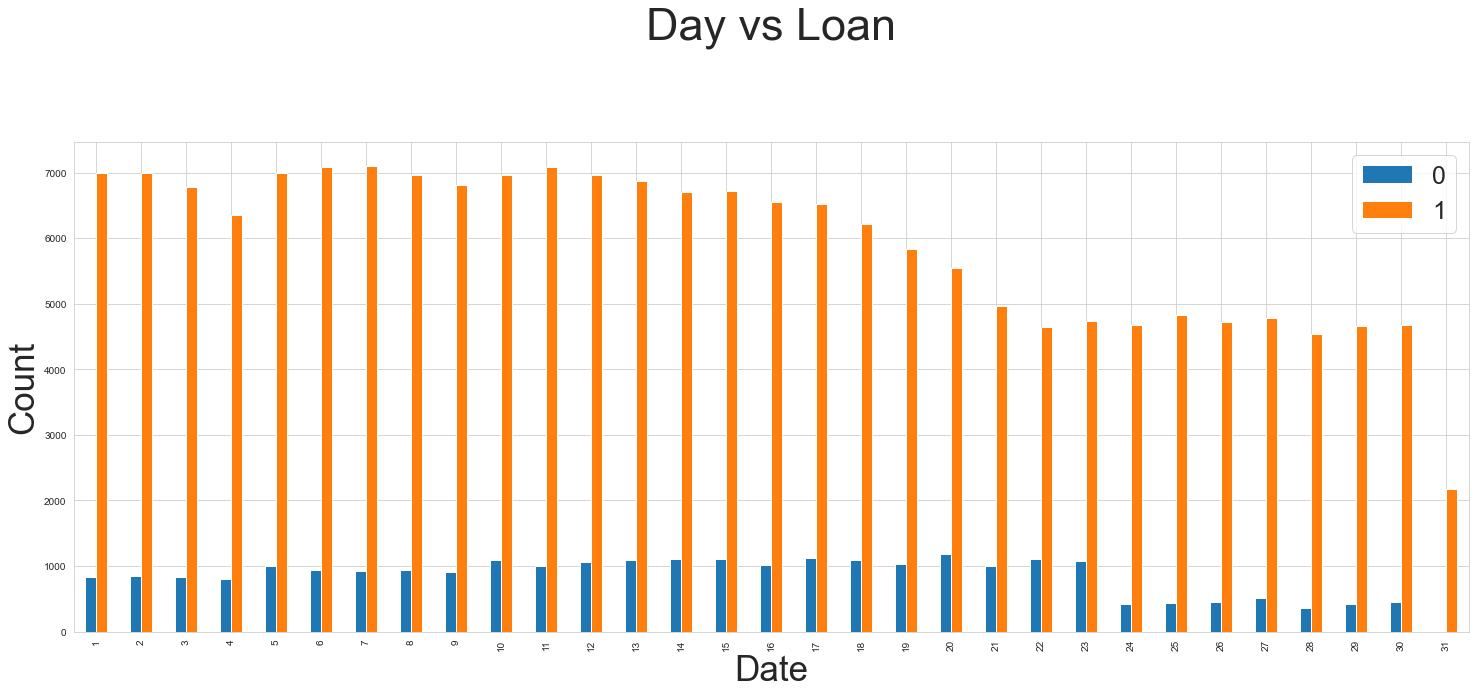

In [23]:
#Defaulter per day 
data.groupby([new_data.date,new_data.label]).size().unstack(level=-1).plot(kind='bar',figsize=(25,9))
plt.title("Day vs Loan",fontsize=45,y=1.2)
plt.xlabel("Date",fontsize=35)
plt.ylabel("Count",fontsize=35)
plt.legend(loc=0,fontsize= 25)
plt.show()

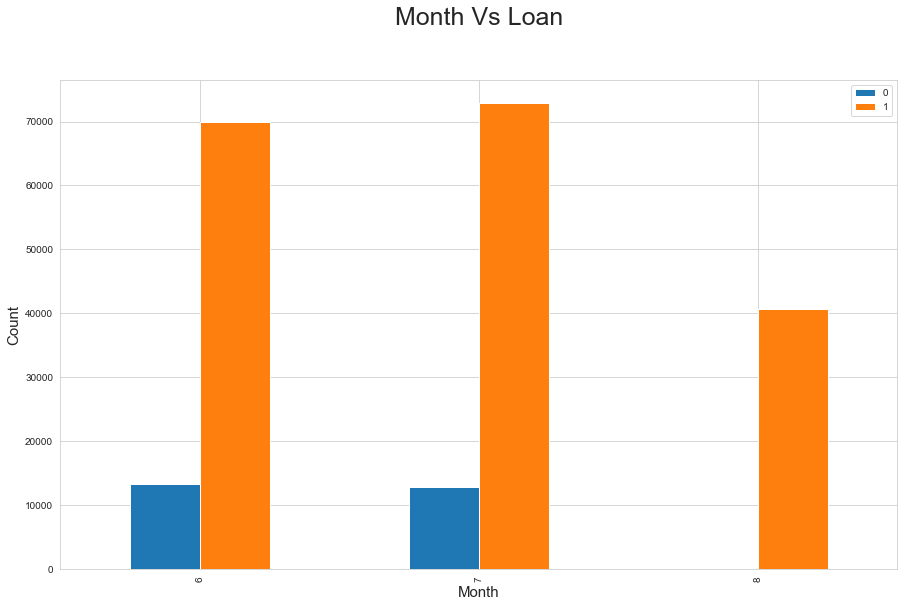

In [24]:
#Defaulter for a month
data.groupby([new_data.month,new_data.label]).size().unstack(level=-1).plot(kind='bar',figsize=(15,9))
plt.title("Month Vs Loan",fontsize=25,y=1.1)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(loc=0)
plt.show()

Text(0.5, 1.0, 'Customer payback time')

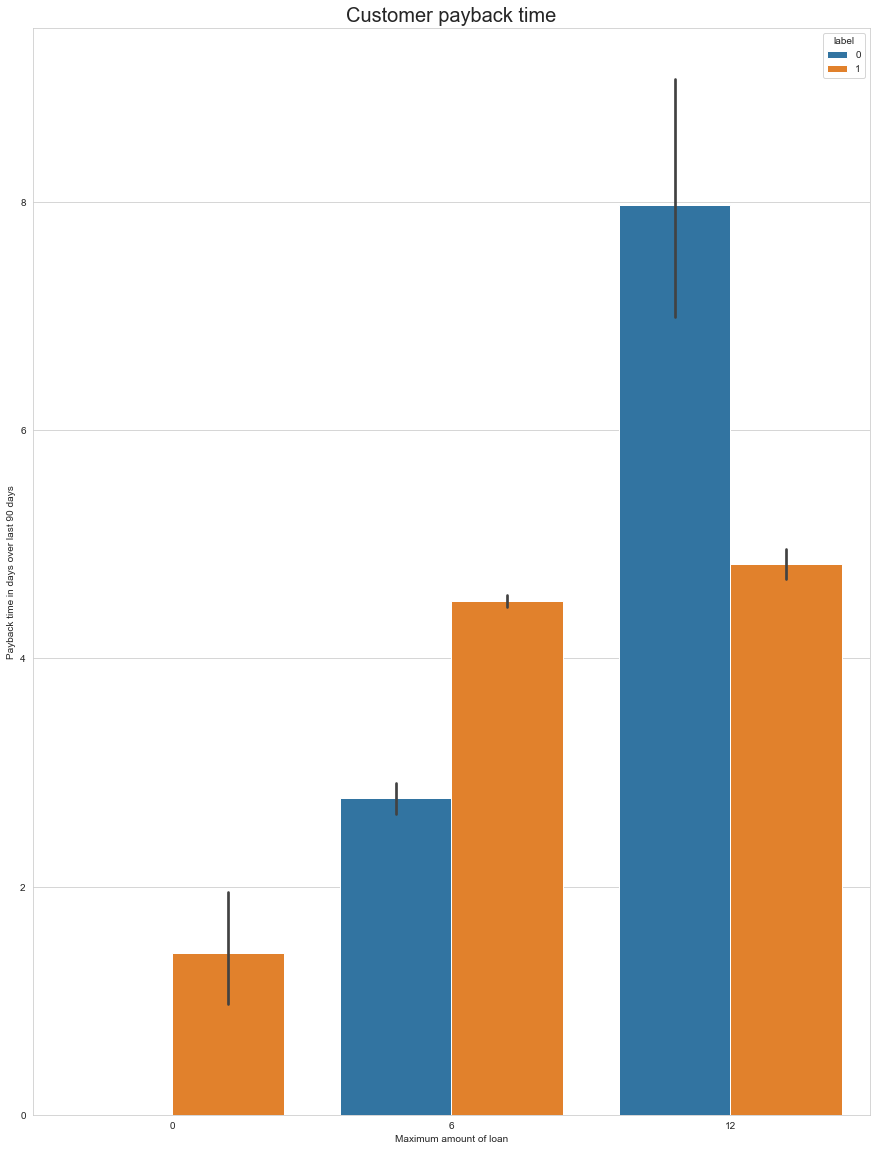

In [25]:
plt.figure(figsize=(15,20))
sns.barplot(x='maxamnt_loans90', y='payback90', data=new_data, hue='label')
plt.xlabel('Maximum amount of loan')
plt.ylabel('Payback time in days over last 90 days')
plt.title('Customer payback time',fontsize=20)

## Processing outliers

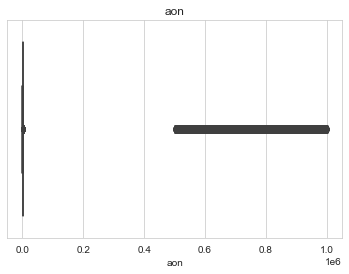

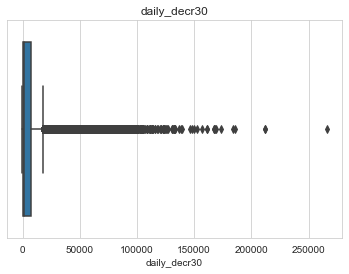

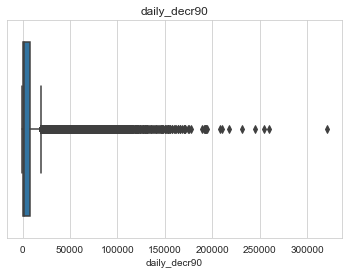

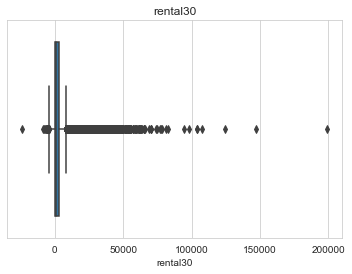

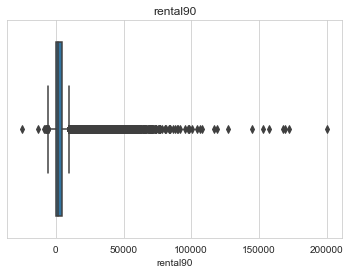

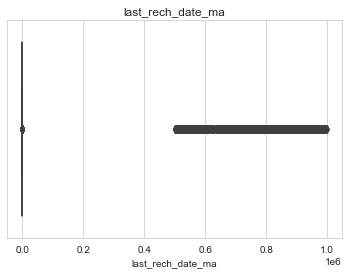

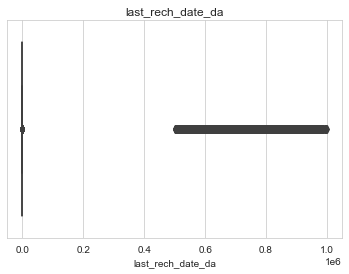

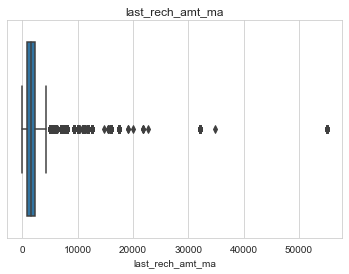

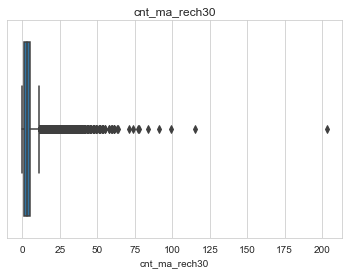

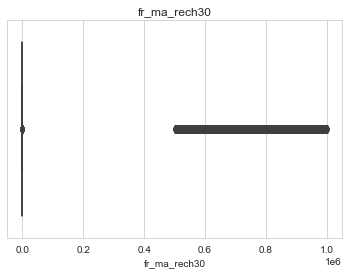

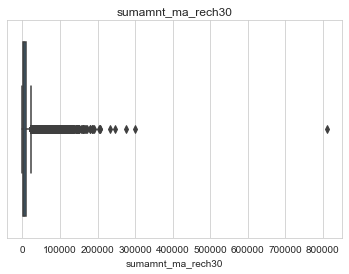

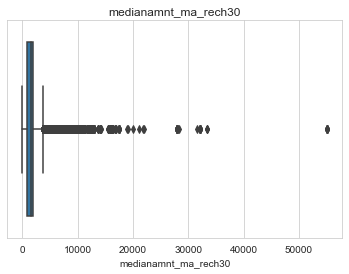

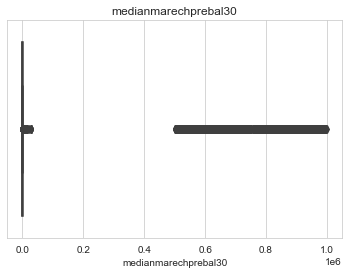

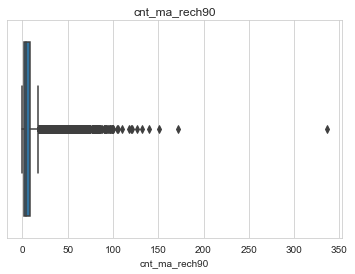

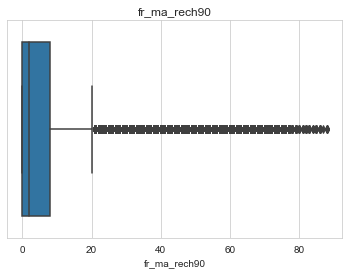

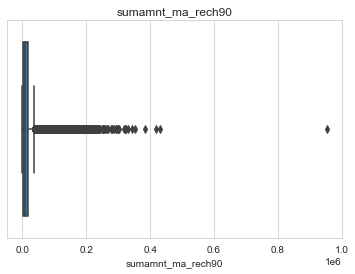

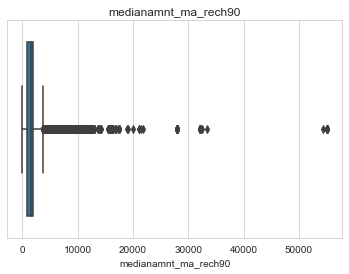

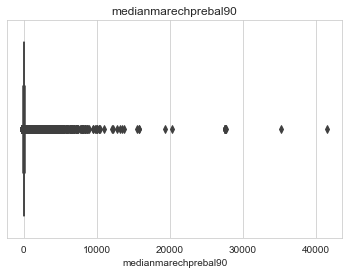

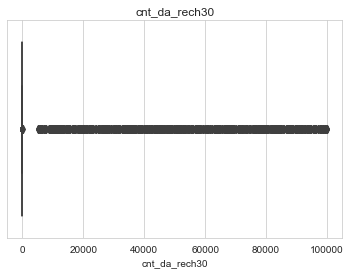

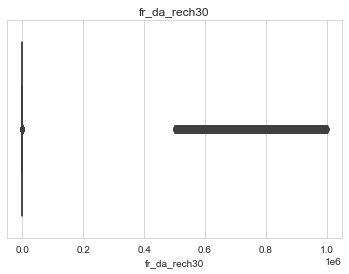

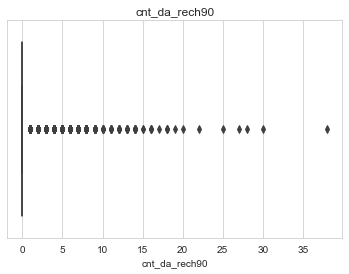

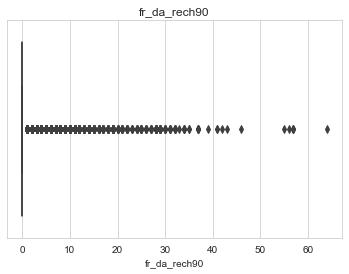

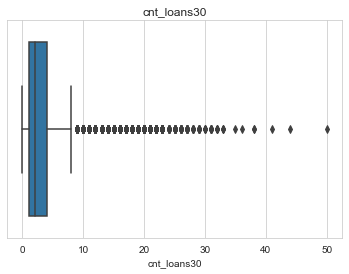

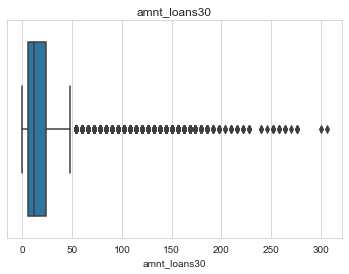

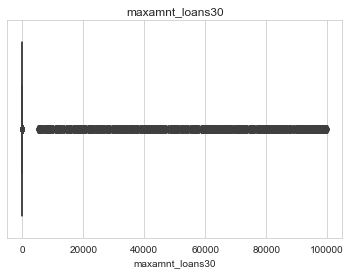

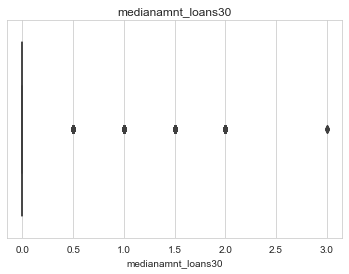

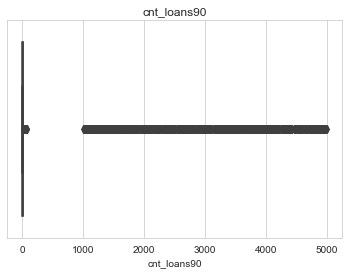

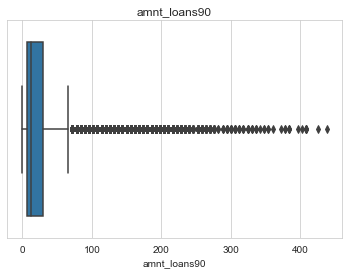

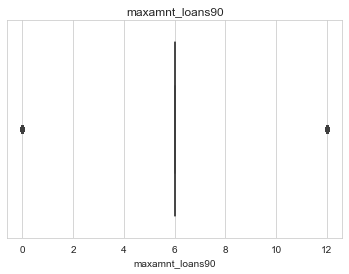

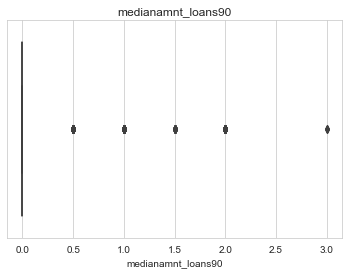

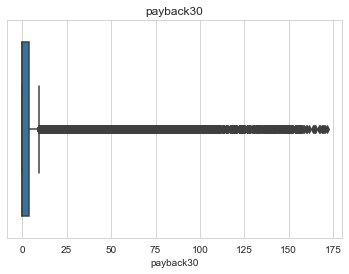

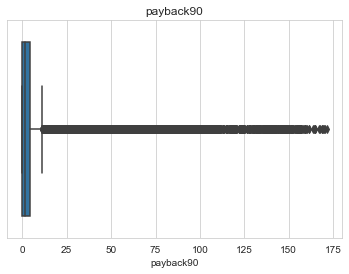

In [26]:
columns = ['aon','daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
for col in columns:
    sns.boxplot(new_data[col])
    plt.title(col)

    plt.show()

In [27]:
new_data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'month', 'date'],
      dtype='object')

In [28]:
new_data.min()

label                       0.000000
aon                       -48.000000
daily_decr30              -93.012667
daily_decr90              -93.012667
rental30               -23737.140000
rental90               -24720.580000
last_rech_date_ma         -29.000000
last_rech_date_da         -29.000000
last_rech_amt_ma            0.000000
cnt_ma_rech30               0.000000
fr_ma_rech30                0.000000
sumamnt_ma_rech30           0.000000
medianamnt_ma_rech30        0.000000
medianmarechprebal30     -200.000000
cnt_ma_rech90               0.000000
fr_ma_rech90                0.000000
sumamnt_ma_rech90           0.000000
medianamnt_ma_rech90        0.000000
medianmarechprebal90     -200.000000
cnt_da_rech30               0.000000
fr_da_rech30                0.000000
cnt_da_rech90               0.000000
fr_da_rech90                0.000000
cnt_loans30                 0.000000
amnt_loans30                0.000000
maxamnt_loans30             0.000000
medianamnt_loans30          0.000000
c

In [29]:
new_data.max()

label                        1.000000
aon                     999860.755168
daily_decr30            265926.000000
daily_decr90            320630.000000
rental30                198926.110000
rental90                200148.110000
last_rech_date_ma       998650.377733
last_rech_date_da       999171.809410
last_rech_amt_ma         55000.000000
cnt_ma_rech30              203.000000
fr_ma_rech30            999606.368132
sumamnt_ma_rech30       810096.000000
medianamnt_ma_rech30     55000.000000
medianmarechprebal30    999479.419319
cnt_ma_rech90              336.000000
fr_ma_rech90                88.000000
sumamnt_ma_rech90       953036.000000
medianamnt_ma_rech90     55000.000000
medianmarechprebal90     41456.500000
cnt_da_rech30            99914.441420
fr_da_rech30            999809.240107
cnt_da_rech90               38.000000
fr_da_rech90                64.000000
cnt_loans30                 50.000000
amnt_loans30               306.000000
maxamnt_loans30          99864.560864
medianamnt_l

There are a lot of negative values and too high values.So will be replacing negative values and outliers by median

In [30]:
new_data.aon

0          272.0
1          712.0
2          535.0
3          241.0
4          947.0
           ...  
209588     404.0
209589    1075.0
209590    1013.0
209591    1732.0
209592    1581.0
Name: aon, Length: 209593, dtype: float64

In [31]:
data[col]

0         29.000000
1          0.000000
2          0.000000
3          0.000000
4          2.333333
            ...    
209588     1.000000
209589     1.000000
209590     3.833333
209591    10.500000
209592     0.000000
Name: payback90, Length: 209593, dtype: float64

In [32]:
# function to replace errorneous value with zero
def replace_0(data,col):
    value = np.where(data[col]<0,0,data[col])
    data[col]=value

In [33]:
#function to replace outliers
def replace_outliers(data,col):
    Q1,Q3 = data[col].quantile(0.25) , data[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    replace = np.where(((data[col]<lower) | (data[col]>upper)),data[col].median(),data[col])
    data[col]=replace

In [34]:
# replacing values for aon
replace_0(new_data,'aon')
replace_outliers(new_data,'aon')

In [35]:
# daily_decr30
replace_0(new_data,'daily_decr30')
replace_outliers(new_data,'daily_decr30')

In [36]:
# daily_decr90
replace_0(new_data,'daily_decr90')
replace_outliers(new_data,'daily_decr90')

In [37]:
#rental30
replace_0(new_data,'rental30')
replace_outliers(new_data,'rental30')

In [38]:
#rental90
replace_0(new_data,'rental90')
replace_outliers(new_data,'rental90')

In [39]:
#last_rech_date_ma
replace_0(new_data,'last_rech_date_ma')
replace_outliers(new_data,'last_rech_date_ma')

In [40]:
#last_rech_date_da
replace_0(new_data,'last_rech_date_da')
replace_outliers(new_data,'last_rech_date_da')

In [41]:
#last_rech_amt_ma
replace_0(new_data,'last_rech_amt_ma')
replace_outliers(new_data,'last_rech_amt_ma')

In [42]:
#cnt_ma_rech30
replace_0(new_data,'cnt_ma_rech30')
replace_outliers(new_data,'cnt_ma_rech30')

In [43]:
#fr_ma_rech30
replace_0(new_data,'fr_ma_rech30')
replace_outliers(new_data,'fr_ma_rech30')

In [44]:
#sumamnt_ma_rech30
replace_0(new_data,'sumamnt_ma_rech30')
replace_outliers(new_data,'sumamnt_ma_rech30')

In [45]:
#medianamnt_ma_rech30
replace_0(new_data,'medianamnt_ma_rech30')
replace_outliers(new_data,'medianamnt_ma_rech30')

In [46]:
#medianmarechprebal30
replace_0(new_data,'medianmarechprebal30')
replace_outliers(new_data,'medianmarechprebal30')

In [47]:
#cnt_ma_rech90
replace_0(new_data,'cnt_ma_rech90')
replace_outliers(new_data,'cnt_ma_rech90')

In [48]:
#fr_ma_rech90
replace_0(new_data,'fr_ma_rech90')
replace_outliers(new_data,'fr_ma_rech90')

In [49]:
#sumamnt_ma_rech90
replace_0(new_data,'sumamnt_ma_rech90')
replace_outliers(new_data,'sumamnt_ma_rech90')

In [50]:
#medianamnt_ma_rech90
replace_0(new_data,'medianamnt_ma_rech90')
replace_outliers(new_data,'medianamnt_ma_rech90')

In [51]:
#medianmarechprebal90
replace_0(new_data,'medianmarechprebal90')
replace_outliers(new_data,'medianmarechprebal90')

In [52]:
#cnt_da_rech30
replace_0(new_data,'cnt_da_rech30')
replace_outliers(new_data,'cnt_da_rech30')

In [53]:
#fr_da_rech30
replace_0(new_data,'fr_da_rech30')
replace_outliers(new_data,'fr_da_rech30')

In [54]:
#cnt_da_rech90
replace_0(new_data,'cnt_da_rech90')
replace_outliers(new_data,'cnt_da_rech90')

In [55]:
#fr_da_rech90
replace_0(new_data,'fr_da_rech90')
replace_outliers(new_data,'fr_da_rech90')

In [56]:
#cnt_loans30
replace_0(new_data,'cnt_loans30')
replace_outliers(new_data,'cnt_loans30')

In [57]:
#amnt_loans30
replace_0(new_data,'amnt_loans30')
replace_outliers(new_data,'amnt_loans30')

In [58]:
#maxamnt_loans30
replace_0(new_data,'maxamnt_loans30')
replace_outliers(new_data,'maxamnt_loans30')

In [59]:
#medianamnt_loans30
replace_0(new_data,'medianamnt_loans30')
replace_outliers(new_data,'medianamnt_loans30')

In [60]:
#cnt_loans90
replace_0(new_data,'cnt_loans90')
replace_outliers(new_data,'cnt_loans90')

In [61]:
#amnt_loans90
replace_0(new_data,'amnt_loans90')
replace_outliers(new_data,'amnt_loans90')

In [62]:
#maxamnt_loans90
replace_0(new_data,'maxamnt_loans90')
replace_outliers(new_data,'maxamnt_loans90')

In [63]:
#medianamnt_loans90
replace_0(new_data,'medianamnt_loans90')
replace_outliers(new_data,'medianamnt_loans90')

In [64]:
#payback30
replace_0(new_data,'payback30')
replace_outliers(new_data,'payback30')

In [65]:
#payback90
replace_0(new_data,'payback90')
replace_outliers(new_data,'payback90')

In [66]:
new_data.skew()

label                  -2.270254
aon                     0.896332
daily_decr30            1.544357
daily_decr90            1.624503
rental30                1.538408
rental90                1.565940
last_rech_date_ma       1.454928
last_rech_date_da       0.000000
last_rech_amt_ma        1.038374
cnt_ma_rech30           0.926260
fr_ma_rech30            1.410670
sumamnt_ma_rech30       1.104489
medianamnt_ma_rech30    0.271429
medianmarechprebal30    1.532532
cnt_ma_rech90           1.029832
fr_ma_rech90            1.837544
sumamnt_ma_rech90       1.209341
medianamnt_ma_rech90    0.340781
medianmarechprebal90    1.373487
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             1.308396
amnt_loans30            1.259116
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             1.435830
amnt_loans90            1.399747
maxamnt_loans90         0.000000
medianamnt

In [67]:
#removing skewness

for col in new_data:
    if new_data[col].skew()>=.5:
        new_data[col] = np.sqrt(new_data[col])

In [68]:
new_data.skew()

label                  -2.270254
aon                     0.224041
daily_decr30            0.694472
daily_decr90            0.750918
rental30                0.529688
rental90                0.548382
last_rech_date_ma       0.215603
last_rech_date_da       0.000000
last_rech_amt_ma       -0.693817
cnt_ma_rech30          -0.267780
fr_ma_rech30            0.404083
sumamnt_ma_rech30      -0.056000
medianamnt_ma_rech30    0.271429
medianmarechprebal30    0.099465
cnt_ma_rech90          -0.097947
fr_ma_rech90            0.532328
sumamnt_ma_rech90       0.100126
medianamnt_ma_rech90    0.340781
medianmarechprebal90   -0.044300
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.506050
amnt_loans30            0.461072
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             0.745316
amnt_loans90            0.713667
maxamnt_loans90         0.000000
medianamnt

In [69]:
X = new_data.drop(['label'],axis=1)
y = new_data.label

In [70]:
X

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date
0,16.492423,55.272507,55.363797,14.836779,16.128546,1.414214,0.0,39.230090,1.414214,1.414214,...,6.0,0.0,1.414214,3.464102,6.0,0.0,0.000000,1.290994,7,20
1,26.683328,110.099955,110.112443,60.755740,60.755740,1.732051,0.0,39.230090,1.000000,0.000000,...,6.0,0.0,1.000000,3.464102,6.0,0.0,0.000000,0.000000,8,10
2,23.130067,37.389838,37.389838,30.002167,30.002167,1.732051,0.0,39.230090,1.000000,0.000000,...,6.0,0.0,1.000000,2.449490,6.0,0.0,0.000000,0.000000,8,19
3,15.524175,4.607385,4.607385,12.626163,12.626163,1.732051,0.0,30.773365,0.000000,0.000000,...,6.0,0.0,1.414214,3.464102,6.0,0.0,0.000000,0.000000,6,6
4,30.773365,12.272707,12.272707,33.149661,33.149661,2.000000,0.0,48.052055,2.645751,1.414214,...,6.0,0.0,2.645751,6.480741,6.0,0.0,1.527525,1.527525,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,20.099751,12.323649,12.323649,33.002879,33.002879,1.000000,0.0,63.623895,1.732051,1.414214,...,6.0,0.0,1.414214,3.464102,6.0,0.0,1.000000,1.000000,6,17
209589,32.787193,6.077499,6.077499,41.573549,41.573549,2.000000,0.0,27.802878,2.000000,1.000000,...,6.0,0.0,1.732051,4.242641,6.0,0.0,1.000000,1.000000,6,12
209590,31.827661,108.826062,109.107058,76.562589,94.303765,1.732051,0.0,39.230090,2.236068,2.828427,...,6.0,0.0,2.449490,7.348469,6.0,0.0,2.000000,1.957890,7,29
209591,41.617304,111.750742,112.135498,20.293595,31.378018,1.414214,0.0,27.802878,2.236068,2.000000,...,6.0,0.0,1.732051,4.898979,6.0,0.0,0.000000,3.240370,7,25


In [71]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

### Standardize data

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
x = pd.DataFrame(scaled)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-0.732246,0.358349,0.337491,-0.850338,-0.844808,-0.283300,0.0,0.317109,-0.200301,0.130937,...,0.0,0.0,-0.274878,-0.306528,0.0,0.0,-0.791146,0.268725,0.273360,0.663721
1,0.336867,1.804645,1.743975,1.245366,0.963983,0.054503,0.0,0.317109,-0.683018,-1.076361,...,0.0,0.0,-0.914664,-0.306528,0.0,0.0,-0.791146,-0.994051,1.622099,-0.521271
2,-0.035900,-0.113378,-0.124257,-0.158202,-0.282494,0.054503,0.0,0.317109,-0.683018,-1.076361,...,0.0,0.0,-0.914664,-0.941992,0.0,0.0,-0.791146,-0.994051,1.622099,0.545222
3,-0.833823,-0.978148,-0.966433,-0.951229,-0.986763,0.054503,0.0,-0.250254,-1.848398,-1.076361,...,0.0,0.0,-0.274878,-0.306528,0.0,0.0,-0.791146,-0.994051,-1.075378,-0.995267
4,0.765947,-0.775944,-0.769512,-0.014553,-0.154923,0.339284,0.0,0.908976,1.234909,0.130937,...,0.0,0.0,1.627328,1.582828,0.0,0.0,0.768161,0.500086,-1.075378,0.900719


### PCA Analysis

In [73]:
from sklearn.decomposition import PCA

pca = PCA(n_components=34)
pca.fit(x)

PCA(n_components=34)

In [74]:
variance = np.round(pca.explained_variance_ratio_,3)

In [75]:
#cumulative sum of variances
var = np.cumsum(variance*100)
var

array([ 38. ,  49.9,  59.5,  64.6,  69.5,  74.1,  78. ,  81.6,  84.8,
        87.4,  89.6,  91.2,  92.6,  93.8,  95. ,  96. ,  96.9,  97.7,
        98.3,  98.8,  99.2,  99.5,  99.8, 100. , 100.1, 100.1, 100.1,
       100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1])

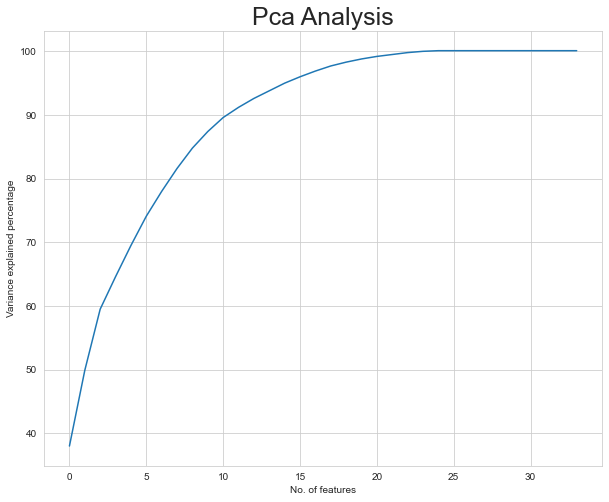

In [76]:
#plot for pca analysis for n_components
plt.figure(figsize=(10,8))
plt.title("Pca Analysis",fontsize=25)
plt.xlabel("No. of features",fontsize=10)
plt.ylabel("Variance explained percentage",fontsize=10)
plt.plot(var)
plt.show()

Will select 20 features at a variance of 99%

In [77]:
Pca = PCA(n_components=20)
x = Pca.fit_transform(x)
x.shape

(209593, 20)

### Model Building and testing

In [78]:
#importing some important modules
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score   
from imblearn.over_sampling import SMOTE

In [79]:
#train test split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=45,test_size=.25,stratify=y)

In [80]:
#oversamling since there is imbalance in dataset
sm = SMOTE(sampling_strategy='minority')
x_train,y_train = sm.fit_resample(xtrain,ytrain)
print(x_train.shape," \n ",y_train.shape)

(275146, 20)  
  (275146,)


Logistic Regression

 accuracy score :  0.75068226492872

 cross validation score :  0.7696713822699497

 [[ 5133  1408]
 [11656 34202]]

 ROC_AUC_SCORE :  0.7652832298615638
              precision    recall  f1-score   support

           0       0.31      0.78      0.44      6541
           1       0.96      0.75      0.84     45858

    accuracy                           0.75     52399
   macro avg       0.63      0.77      0.64     52399
weighted avg       0.88      0.75      0.79     52399

Precision:  0.9604605447907891
Recall:  0.7458240655937896
F1 score:  0.8396425590415869
AxesSubplot(0.125,0.536818;0.62x0.343182)


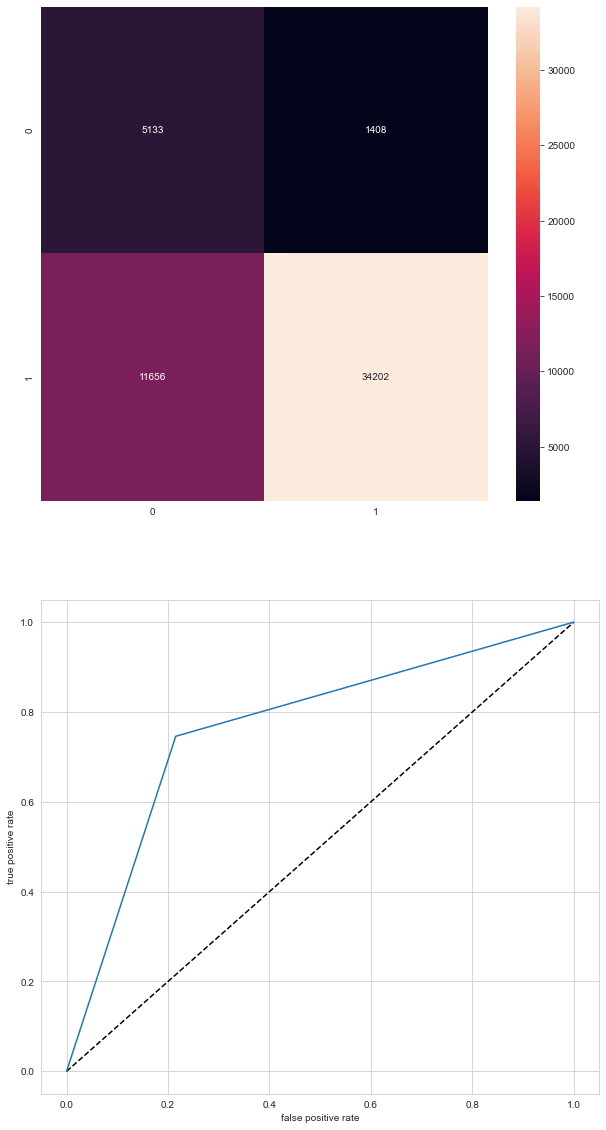

In [81]:
#logistic regression
LR = LogisticRegression()
print("Logistic Regression")
LR.fit(x_train, y_train) 
pred = LR.predict(xtest)
accuracy = accuracy_score(ytest,pred)
print("\n","accuracy score : ",accuracy)
cross=cross_val_score(LR,x_train,y_train,cv=10,scoring="accuracy").mean()
print("\n","cross validation score : ",cross)
cm = confusion_matrix(ytest,pred)
print("\n",cm)
fpr,tpr,thresholds=roc_curve(ytest,pred)
roc_auc = auc(fpr,tpr)
print("\n","ROC_AUC_SCORE : ",roc_auc)
print(classification_report(ytest,pred))
precision = precision_score(ytest, pred)
print('Precision: ', precision)
recall = recall_score(ytest, pred)
print('Recall: ', recall)
f1 = f1_score(ytest, pred)
print('F1 score: ', f1)
plt.figure(figsize=(10,20))
plt.subplot(211)
print(sns.heatmap(cm,annot=True,fmt='d'))
plt.subplot(212)
plt.plot([0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

Decision Tree Classifier

 accuracy score :  0.8210271188381457

 cross validation score :  0.8724422810815978

 [[ 3947  2594]
 [ 6784 39074]]

 ROC_AUC_SCORE :  0.7277448116277451
              precision    recall  f1-score   support

           0       0.37      0.60      0.46      6541
           1       0.94      0.85      0.89     45858

    accuracy                           0.82     52399
   macro avg       0.65      0.73      0.67     52399
weighted avg       0.87      0.82      0.84     52399

Precision:  0.9377459921282519
Recall:  0.8520650704348205
F1 score:  0.8928546946050318
AxesSubplot(0.125,0.536818;0.62x0.343182)


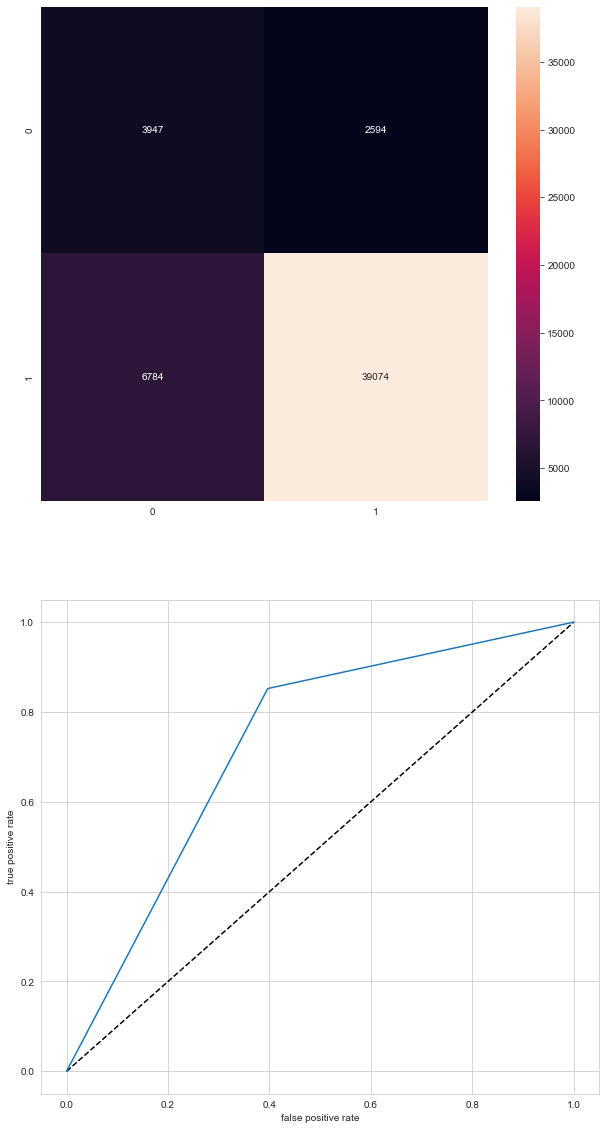

In [82]:
#Decision Tree Classifier 
DTC = DecisionTreeClassifier()
print("Decision Tree Classifier")
DTC.fit(x_train, y_train) 
pred1 = DTC.predict(xtest)
accuracy = accuracy_score(ytest,pred1)
print("\n","accuracy score : ",accuracy)
cross=cross_val_score(DTC,x_train,y_train,cv=10,scoring="accuracy").mean()
print("\n","cross validation score : ",cross)
cm = confusion_matrix(ytest,pred1)
print("\n",cm)
fpr,tpr,thresholds=roc_curve(ytest,pred1)
roc_auc = auc(fpr,tpr)
print("\n","ROC_AUC_SCORE : ",roc_auc)
print(classification_report(ytest,pred1))
precision = precision_score(ytest, pred1)
print('Precision: ', precision)
recall = recall_score(ytest, pred1)
print('Recall: ', recall)
f1 = f1_score(ytest, pred1)
print('F1 score: ', f1)
plt.figure(figsize=(10,20))
plt.subplot(211)
print(sns.heatmap(cm,annot=True,fmt='d'))
plt.subplot(212)
plt.plot([0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')   
plt.show()

Random Forest Classifier

 accuracy score :  0.8868108170003244

 cross validation score :  0.9353252553924245

 [[ 4192  2349]
 [ 3582 42276]]

 ROC_AUC_SCORE :  0.7813849548884608
              precision    recall  f1-score   support

           0       0.54      0.64      0.59      6541
           1       0.95      0.92      0.93     45858

    accuracy                           0.89     52399
   macro avg       0.74      0.78      0.76     52399
weighted avg       0.90      0.89      0.89     52399

Precision:  0.9473613445378152
Recall:  0.921889310480178
F1 score:  0.9344517754716355
AxesSubplot(0.125,0.536818;0.62x0.343182)


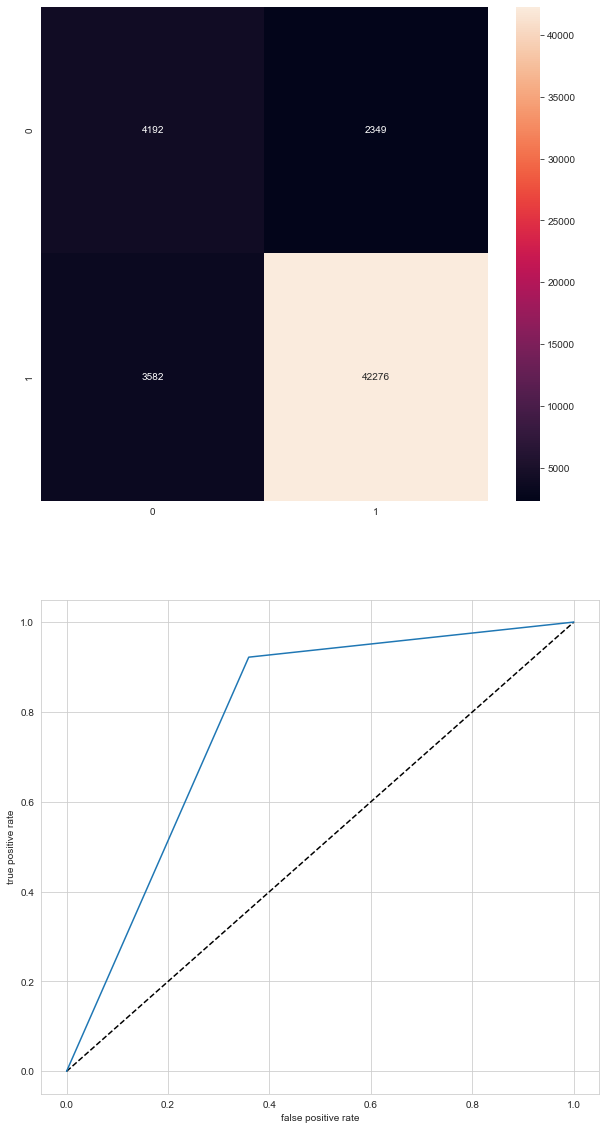

In [84]:
# Random forest Classifier

RFC = RandomForestClassifier(n_estimators=100)
print("Random Forest Classifier")
RFC.fit(x_train, y_train.ravel()) 
pred5 = RFC.predict(xtest)
accuracy = accuracy_score(ytest,pred5)
print("\n","accuracy score : ",accuracy)
cross=cross_val_score(RFC,x_train,y_train,cv=10,scoring="accuracy").mean()
print("\n","cross validation score : ",cross)
cm = confusion_matrix(ytest,pred5)
print("\n",cm)
fpr,tpr,thresholds=roc_curve(ytest,pred5)
roc_auc= auc(fpr,tpr)
print("\n","ROC_AUC_SCORE : ",roc_auc)
print(classification_report(ytest,pred5))
precision = precision_score(ytest, pred5)
print('Precision: ', precision)
recall = recall_score(ytest, pred5)
print('Recall: ', recall)
f1 = f1_score(ytest, pred5)
print('F1 score: ', f1)
plt.figure(figsize=(10,20))
plt.subplot(211)
print(sns.heatmap(cm,annot=True,fmt='d'))
plt.subplot(212)
plt.plot([0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

Ada boost classifier

 accuracy score :  0.7768468863909617

 cross validation score :  0.798281682537551

 [[ 5102  1439]
 [10254 35604]]

 ROC_AUC_SCORE :  0.7781998802509069
              precision    recall  f1-score   support

           0       0.33      0.78      0.47      6541
           1       0.96      0.78      0.86     45858

    accuracy                           0.78     52399
   macro avg       0.65      0.78      0.66     52399
weighted avg       0.88      0.78      0.81     52399

Precision:  0.9611532543260535
Recall:  0.776396702865367
F1 score:  0.8589522442431334
AxesSubplot(0.125,0.536818;0.62x0.343182)


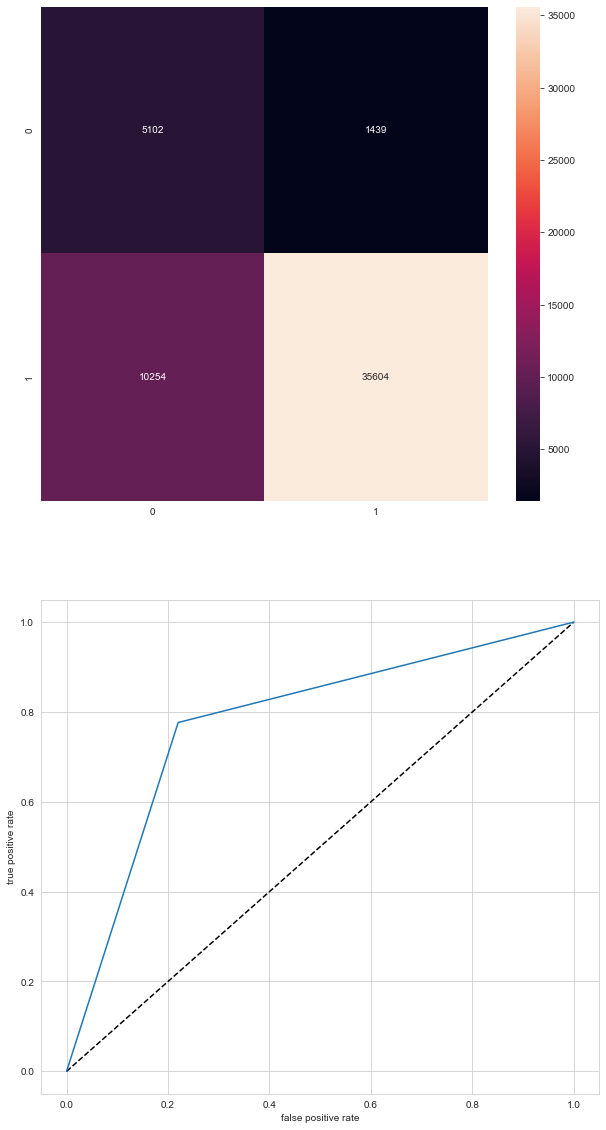

In [85]:
#Ada boost classifier

ADB = AdaBoostClassifier(n_estimators=150)
print("Ada boost classifier")
ADB.fit(x_train, y_train.ravel()) 
pred6 = ADB.predict(xtest)
accuracy = accuracy_score(ytest,pred6)
print("\n","accuracy score : ",accuracy)
cross=cross_val_score(ADB,x_train,y_train,cv=10,scoring="accuracy").mean()
print("\n","cross validation score : ",cross)
cm = confusion_matrix(ytest,pred6)
print("\n",cm)
fpr,tpr,thresholds=roc_curve(ytest,pred6)
roc_auc= auc(fpr,tpr)
print("\n","ROC_AUC_SCORE : ",roc_auc)
print(classification_report(ytest,pred6))
precision = precision_score(ytest, pred6)
print('Precision: ', precision)
recall = recall_score(ytest, pred6)
print('Recall: ', recall)
f1 = f1_score(ytest, pred6)
print('F1 score: ', f1)
plt.figure(figsize=(10,20))
plt.subplot(211)
print(sns.heatmap(cm,annot=True,fmt='d'))
plt.subplot(212)
plt.plot([0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [86]:
#creating a dataframe for the evaluation metrics of models
data = [['Logistic Regression',75.03,76.88,96.02,74.56,76.44,83.94],
       ['Linear SVC',74.78,76.85,96.00,74.27,76.29,83.75],
       ['Decision Tree',82.22,87.16,93.85,85.28,73.05,89.36],
       ['Random Forest',88.63,93.56,94.62,92.24,77.75,93.42],
       ['Adaboost',77.90,79.73,96.13,77.88,77.96,86.05]]
selection = pd.DataFrame(data,columns=['Model','Accuracy','Cross validation score','Precision','Recall','Roc_auc score','F1-score'],dtype=float)   
selection

,Model,Accuracy,Cross validation score,Precision,Recall,Roc_auc score,F1-score
0,Logistic Regression,75.03,76.88,96.02,74.56,76.44,83.94
1,Linear SVC,74.78,76.85,96.00,74.27,76.29,83.75
2,Decision Tree,82.22,87.16,93.85,85.28,73.05,89.36
3,Random Forest,88.63,93.56,94.62,92.24,77.75,93.42
4,Adaboost,77.90,79.73,96.13,77.88,77.96,86.05


Selecting Random Forest as the best model as the accuracy is highest among all other models and Cross validation score, precision, f1-score is also the highest so random forest will perform the best here. The Roc-auc is also 77.75 which quite good since the model is able to claasify the labels as positive or negative at a rate of 78%

### Hyperparameter tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
# performing random search cv on random forest model for hypertuning
search_param = {'n_estimators':[100, 150 ,200],
              'criterion':['gini','entropy'],
              'max_depth':[6,8,10,12],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample']
              }
Rsearch = RandomizedSearchCV(RFC, search_param, n_iter=5, cv=5, verbose=5)   
# fitting the training data into ranomized search
Rsearch.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, n_estimators=100; total time=  42.2s
[CV 2/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, n_estimators=100; total time=  41.2s
[CV 3/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, n_estimators=100; total time=  41.5s
[CV 4/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, n_estimators=100; total time=  41.1s
[CV 5/5] END class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=log2, n_estimators=100; total time=  41.2s
[CV 1/5] END class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, n_estimators=150; total time= 1.3min
[CV 2/5] END class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=log2, n_estimators=150; total time= 1.3min
[CV 3/5] END class_weig

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 150, 200]},
                   verbose=5)

In [89]:
#best parameters after tuning
Rsearch.best_params_

{'n_estimators': 100,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': 'balanced_subsample'}

### Tuning with best parameters

In [90]:
tune_model = RandomForestClassifier(n_estimators=200,max_features='log2',max_depth=10,criterion='gini',class_weight='balanced')   
tune_model.fit(x_train, y_train.ravel())
tuned_pred = tune_model.predict(xtest)

accuracy = accuracy_score(ytest,tuned_pred)
print("\n","accuracy score : ",accuracy)

print(classification_report(ytest,tuned_pred))


 accuracy score :  0.8119048073436516
              precision    recall  f1-score   support

           0       0.38      0.79      0.51      6541
           1       0.96      0.82      0.88     45858

    accuracy                           0.81     52399
   macro avg       0.67      0.80      0.70     52399
weighted avg       0.89      0.81      0.84     52399




Since after tuning the model with best parameters the accuracy is decreasing we will be saving the model with default parameters for better accuracy.

### Saving the model

In [91]:
import pickle
filename='MicroCreditDefaulter_FinalModel.pickle'
pickle.dump(RFC,open(filename,'wb'))